In [39]:
import geopandas as gpd
import shapefile as shp
import matplotlib.pyplot as plt
import pandas as pd
import rtree
import seaborn as sns
import matplotlib
import numpy as np

In [11]:
ADMIN2_SHP = 'Data/ET_Admin2_2014/ET_Admin2_2014.shp'

In [46]:
df = gpd.read_file("Data/ET_LivelihoodZones/ET_LHZ_2009.shp")
df.head(n=10)

,FNID,EFF_YEAR,COUNTRY,LZNUM,LZCODE,LZNAMEEN,LZNAMEFR,LZNAMESP,LZNAMEPT,CLASS,ADMIN1,LZTYPE,MAINCROPS,MAINLSTOCK,LIAS,geometry
0,ET2009L101,2009,ET,1,ET01,Addis Ababa City,None,None,None,UB01,Addis Ababa,Urban,None,None,UBN,"POLYGON ((38.77103 9.09937, 38.77103 9.09937, ..."
1,ET2009L102,2009,ET,2,ET02,Asale Agropastoral,None,None,None,PS04,Afar,Agropastoral,maize & barley,cattle & shoats,AAP,"MULTIPOLYGON (((40.01477 13.28229, 40.01104 13..."
2,ET2009L103,2009,ET,3,ET03,Awsa-Gewane Agropastoral,None,None,None,PS02,Afar,Agropastoral,maize & date palm,cattle & camels,AGA,"MULTIPOLYGON (((40.35589 9.45828, 40.34862 9.4..."
3,ET2009L104,2009,ET,4,ET04,Aramiss - Adaar Pastoral,None,None,None,SH01,Afar,Pastoral,None,camels & cattle,ARP,"POLYGON ((40.98186 11.61329, 40.98163 11.61287..."
4,ET2009L105,2009,ET,5,ET05,Asale Pastoral,None,None,None,SH02,Afar,Pastoral,None,camels & shoats,ASP,"POLYGON ((40.22576 14.48282, 40.27167 14.45745..."
5,ET2009L106,2009,ET,6,ET06,Chenno Agropastoral,None,None,None,PS04,Afar,Agropastoral,"sorghum, teff & maize",cattle & shoats,CNO,"POLYGON ((39.87427 9.75721, 39.87899 9.75611, ..."
6,ET2009L107,2009,ET,7,ET07,Eli daar Pastoral,None,None,None,SH02,Afar,Pastoral,None,camels & shoats,ELP,"POLYGON ((41.93519 11.80312, 41.90103 11.78745..."
7,ET2009L108,2009,ET,8,ET08,Namalefan & Baadu Pastoral,None,None,None,SH02,Afar,Pastoral,None,camels & shoats,NMP,"POLYGON ((41.16834 10.78409, 41.15235 10.76556..."
8,ET2009L109,2009,ET,9,ET09,Teru Pastoral,None,None,None,SH01,Afar,Pastoral,None,camels & cattle,TER,"POLYGON ((40.89240 12.42524, 40.89178 12.40902..."
9,ET2009L110,2009,ET,10,ET10,Abay Beshilo River Basin,None,None,None,AN01,Amhara,Cropping,"sorghum, teff, pulses & maize",cattle & shoats,ABB,"POLYGON ((38.41055 11.62700, 38.41068 11.62372..."


In [44]:
df.ADMIN1.unique()

array(['Addis Ababa', 'Afar', 'Amhara', 'Benshangul', 'Gambela', 'Oromia',
       'SNNPR', 'Somali', 'Tigray'], dtype=object)

In [45]:
df.LZNAMEEN.unique()

array(['Addis Ababa City', 'Asale Agropastoral',
       'Awsa-Gewane Agropastoral', 'Aramiss - Adaar Pastoral',
       'Asale Pastoral', 'Chenno Agropastoral', 'Eli daar Pastoral',
       'Namalefan & Baadu Pastoral', 'Teru Pastoral',
       'Abay Beshilo River Basin', 'Abay Tekeze Watershed',
       'Central Highland Barley & Potato', 'Cheffa valley',
       'Guna Highland', 'Merhabete Lowland Sorghum and teff',
       'Minjar teff and livestock', 'Minjar teff and sorghum',
       'North Wollo Highland Belg', 'North East Woyna Dega Mixed Cereal',
       'North Shewa highland sheep and barley',
       'North Shewa Highland Wheat and Teff productive',
       'N Highland wheat, Barley & Sheep', 'NorthWest Cash Crop',
       'North Wollo East Plain', 'NorthWest Sorghum Belt',
       'South Wollo Meher', 'South Wollo Belg',
       'South West Maize, Finger Millet and Teff productive',
       'South Wollo & Oromia Eastern lowland sorghum & cattle',
       'South East Woyna Dega Teff', 'Sout

In [21]:
df.LZTYPE=df.LZTYPE.astype(str)

Text(0.5, 1.0, 'Livelihood zones in Ethiopia')

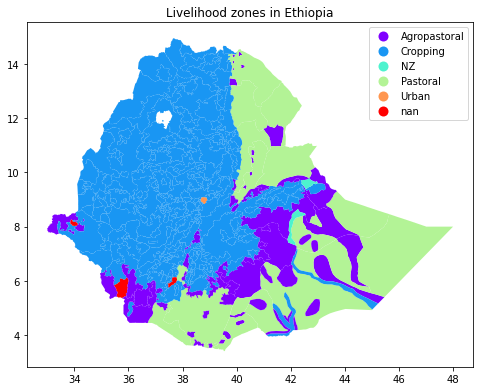

In [24]:
#plt.subplot(1,1,1)
plt = df.plot(column='LZTYPE', cmap='rainbow', legend=True, figsize=(8, 8))
plt.set_title('Livelihood zones in Ethiopia')

In [26]:
df['LZTYPE'].unique()
df['past_agropast'] = np.where((df['LZTYPE']=='Pastoral')|(df['LZTYPE']=='Agropastoral'), 1, 0)
df.head()

,FNID,EFF_YEAR,COUNTRY,LZNUM,LZCODE,LZNAMEEN,LZNAMEFR,LZNAMESP,LZNAMEPT,CLASS,ADMIN1,LZTYPE,MAINCROPS,MAINLSTOCK,LIAS,geometry,past_agropast
0,ET2009L101,2009,ET,1,ET01,Addis Ababa City,None,None,None,UB01,Addis Ababa,Urban,None,None,UBN,"POLYGON ((38.77103 9.09937, 38.77103 9.09937, ...",0
1,ET2009L102,2009,ET,2,ET02,Asale Agropastoral,None,None,None,PS04,Afar,Agropastoral,maize & barley,cattle & shoats,AAP,"MULTIPOLYGON (((40.01477 13.28229, 40.01104 13...",1
2,ET2009L103,2009,ET,3,ET03,Awsa-Gewane Agropastoral,None,None,None,PS02,Afar,Agropastoral,maize & date palm,cattle & camels,AGA,"MULTIPOLYGON (((40.35589 9.45828, 40.34862 9.4...",1
3,ET2009L104,2009,ET,4,ET04,Aramiss - Adaar Pastoral,None,None,None,SH01,Afar,Pastoral,None,camels & cattle,ARP,"POLYGON ((40.98186 11.61329, 40.98163 11.61287...",1
4,ET2009L105,2009,ET,5,ET05,Asale Pastoral,None,None,None,SH02,Afar,Pastoral,None,camels & shoats,ASP,"POLYGON ((40.22576 14.48282, 40.27167 14.45745...",1


In [29]:
df["SHAPE_Area"]=df.geometry.area

In [30]:
def get_total_shape_area(row, df):
    sub = df.loc[df['ADMIN1']==row['ADMIN1']]
    total = sub['SHAPE_Area'].sum()
    return total

In [31]:
grouped = df[['ADMIN1', 'SHAPE_Area', 'past_agropast']].groupby(['ADMIN1', 'past_agropast']).agg('sum').reset_index()
#grouped['proportion'] = grouped['area']/grouped['SHAPE_Area']
grouped

,ADMIN1,past_agropast,SHAPE_Area
0,Addis Ababa,0,0.045311
1,Afar,1,8.025981
2,Amhara,0,12.653667
3,Benshangul,0,4.053200
4,Gambela,0,1.534295
5,Gambela,1,0.554521
6,Oromia,0,16.174272
7,Oromia,1,10.574382
8,SNNPR,0,7.099386
9,SNNPR,1,2.112710


In [32]:
grouped['total_shape_area'] = grouped.apply(lambda x: get_total_shape_area(x, grouped), axis=1)
grouped['proportion'] = grouped['SHAPE_Area']/grouped['total_shape_area']
grouped.head()


,ADMIN1,past_agropast,SHAPE_Area,total_shape_area,proportion
0,Addis Ababa,0,0.045311,0.045311,1.000000
1,Afar,1,8.025981,8.025981,1.000000
2,Amhara,0,12.653667,12.653667,1.000000
3,Benshangul,0,4.053200,4.053200,1.000000
4,Gambela,0,1.534295,2.088816,0.734528


In [33]:
past_agropast = grouped.loc[grouped['past_agropast']==1]
past_agropast

,ADMIN1,past_agropast,SHAPE_Area,total_shape_area,proportion
1,Afar,1,8.025981,8.025981,1.000000
5,Gambela,1,0.554521,2.088816,0.265472
7,Oromia,1,10.574382,26.748654,0.395324
9,SNNPR,1,2.112710,9.212096,0.229341
11,Somali,1,24.195270,25.712477,0.940993


/Users/tinkavalentijn/opt/anaconda3/envs/aafi/lib/python3.8/site-packages/geopandas/plotting.py:470: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(
/Users/tinkavalentijn/opt/anaconda3/envs/aafi/lib/python3.8/site-packages/geopandas/plotting.py:470: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


Text(0.5, 1.0, 'Ethiopia regions of interest')

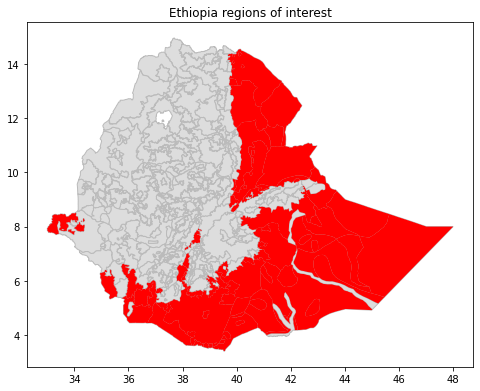

In [40]:
f, ax = plt.subplots(figsize=(8, 8))
df.plot(column='ADMIN0', color='#DDDDDD', edgecolor='#BBBBBB',ax=ax)
df.loc[df['past_agropast']==1].plot(column='past_agropast', color='red', legend=True, ax=ax)
plt.title('Ethiopia regions of interest')
#    plt.show()
#ax.set_title('Livelihood zones in Ethiopia')
#    color = 'YlGnBu'
#    gdf.plot(ax=ax, column='ADMIN0', color='#DDDDDD', edgecolor='#BBBBBB')
#    gdf.loc[gdf['ADMIN1']==region].plot(ax=ax, color='red')
#    plt.title(region)
#    plt.show()

In [42]:
# Admin1 regions that are 30% or more agropastoral
# grouped.loc[(grouped['LZTYPE']=='Agropastoral')&(grouped['proportion']>0.3)]
grouped.loc[(grouped['past_agropast']==1)&(grouped['proportion']>0.3)]

,ADMIN1,past_agropast,SHAPE_Area,total_shape_area,proportion
1,Afar,1,8.025981,8.025981,1.000000
7,Oromia,1,10.574382,26.748654,0.395324
11,Somali,1,24.195270,25.712477,0.940993


In [43]:
overlap['proportion'] = overlap['area']/overlap['SHAPE_Area']
overlap[['area', 'SHAPE_Area', 'proportion']]

NameError: name 'overlap' is not defined

In [ ]:
# for each admin1 zone, get percentage in each livelihood zone
# Zones that are majoritarily agropastoral
overlap['']

In [47]:
df_results=pd.DataFrame("value"=[1,2,3],"name"=["p","g","f"])

SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (<ipython-input-47-dc5431c102a1>, line 1)

In [ ]:
df_results["countryName"]=iso3